In [3]:
# Breast Cancer Classification - Supervised Learning

# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load and Explore Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target Classes:", data.target_names)
print("First 5 Rows:", df.head())

Dataset Loaded Successfully!
Dataset Shape: (569, 31)
Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
Target Classes: ['malignant' 'benign']
First 5 Rows:    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.109

The preprocessing steps ensure the dataset is clean, consistent, and ready for machine learning. They prevent scale bias, improve algorithm performance, and ensure reliable evaluation metrics.

In [5]:
# Data Preprocessing
# Check for missing values
print("Missing Values:", df.isnull().sum())

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

Missing Values: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")
print("Training Samples:", X_train.shape[0], " | Testing Samples:", X_test.shape[0])

Data Preprocessing Complete!
Training Samples: 455  | Testing Samples: 114


**Logistic Regression**

How it works:
Logistic Regression is a linear model used for binary classification. It estimates the probability that a given input belongs to a particular class using the sigmoid (logistic) function. The output ranges between 0 and 1, which can be interpreted as a probability.

Why it’s suitable:

The breast cancer dataset is a binary classification problem (malignant vs. benign).

Logistic Regression is simple, interpretable, and performs well when the relationship between features and target is approximately linear.

**Decision Tree Classifier**

How it works:
A Decision Tree splits the dataset into smaller subsets based on feature values using metrics like Gini impurity or entropy. Each node represents a decision rule, and leaves represent the predicted class.

Why it’s suitable:

Works well with both linear and non-linear relationships.

Easy to interpret and visualize.

Can handle unscaled numerical data and capture feature interactions automatically.

**Random Forest Classifier**

How it works:
Random Forest is an ensemble method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random subset of features and data.

Why it’s suitable:

Handles large feature sets well.

Reduces overfitting seen in single trees.

Often achieves high accuracy and robust generalization on tabular datasets like this one.

**Support Vector Machine (SVM)**

How it works:
SVM finds the optimal hyperplane that best separates the classes by maximizing the margin between them. For non-linear data, SVM uses kernel functions (like RBF) to project data into higher dimensions where it becomes linearly separable.

Why it’s suitable:

Effective in high-dimensional spaces like this dataset (30 features).

Robust against overfitting, especially with proper kernel and regularization.

Works well when there’s a clear boundary between classes (as in malignant vs. benign).

**k-Nearest Neighbors (k-NN)**

How it works:
k-NN is a non-parametric algorithm that classifies a sample based on the majority label of its k nearest neighbors in the feature space. Distance metrics (like Euclidean) are used to find the nearest points.

Why it’s suitable:

Simple and intuitive, requires no explicit model training.

Performs well when the dataset is not too large and the decision boundaries are smooth.

Useful as a baseline model for comparison.

In [7]:
# Model Implementation

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f" {name}")
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
    print("Classification Report:", classification_report(y_test, y_pred))

 Logistic Regression
Accuracy: 0.9737
Confusion Matrix: [[41  2]
 [ 1 70]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

 Decision Tree
Accuracy: 0.9474
Confusion Matrix: [[40  3]
 [ 3 68]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

 Random Forest
Accuracy: 0.9649
Confusion Matrix: [[40  3]
 [ 1 70]]
Classification Report:               precision    recall  f1-score   support

         

In [8]:
#  Model Comparison

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
worst_model = results_df.loc[results_df['Accuracy'].idxmin()]

print("Model Performance Summary:", results_df)
print("Best Model:", best_model['Model'], "| Accuracy:", round(best_model['Accuracy'], 4))
print("Worst Model:", worst_model['Model'], "| Accuracy:", round(worst_model['Accuracy'], 4))

Model Performance Summary:                     Model  Accuracy
0     Logistic Regression  0.973684
1           Decision Tree  0.947368
2           Random Forest  0.964912
3  Support Vector Machine  0.973684
4     k-Nearest Neighbors  0.947368
Best Model: Logistic Regression | Accuracy: 0.9737
Worst Model: Decision Tree | Accuracy: 0.9474


/tmp/ipython-input-4064848215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


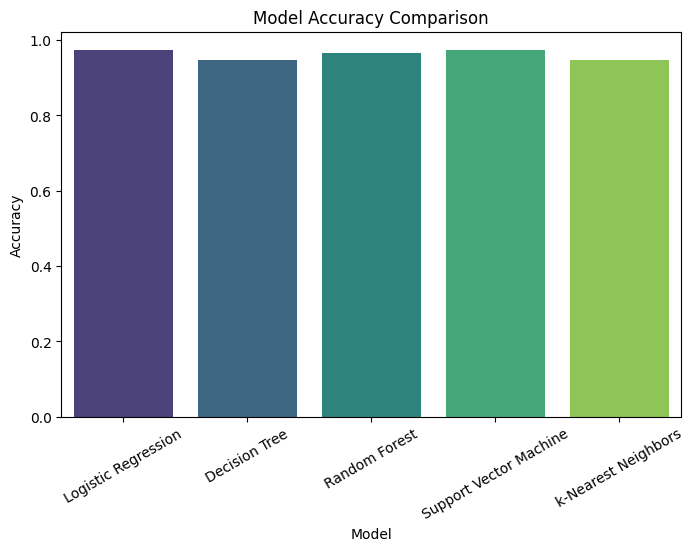

In [9]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.show()

In [10]:
# Conclusion
print("CONCLUSION:")
print(f"The best performing model is {best_model['Model']} with an accuracy of {round(best_model['Accuracy'], 4)}.")
print(f"The worst performing model is {worst_model['Model']} with an accuracy of {round(worst_model['Accuracy'], 4)}.")
print("Classification Analysis Completed Successfully!")

CONCLUSION:
The best performing model is Logistic Regression with an accuracy of 0.9737.
The worst performing model is Decision Tree with an accuracy of 0.9474.
Classification Analysis Completed Successfully!
